### Datasets

### https://drive.google.com/drive/folders/1DG_dgY3ZEyoLhSaXPNnhyBu5ur_5mAut

### Imports

In [1]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [2]:
data=pd.read_csv('CreditCardData.csv')

In [3]:
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


### Cleaning

In [4]:
data.isnull().sum()

Transaction ID             0
Date                       0
Day of Week                0
Time                       0
Type of Card               0
Entry Mode                 0
Amount                     6
Type of Transaction        0
Merchant Group            10
Country of Transaction     0
Shipping Address           5
Country of Residence       0
Gender                     4
Age                        0
Bank                       0
Fraud                      0
dtype: int64

In [5]:
data=data.dropna()

In [6]:
data.duplicated().sum()

0

In [7]:
data

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,#3203 892,13-Oct-20,Tuesday,22,MasterCard,Tap,£15,POS,Electronics,United Kingdom,United Kingdom,United Kingdom,F,53.8,Halifax,0
99996,#3304 849,14-Oct-20,Wednesday,23,MasterCard,PIN,£7,ATM,Children,Russia,Russia,Russia,M,45.0,Barclays,0
99997,#3532 129,13-Oct-20,Tuesday,11,MasterCard,PIN,£21,ATM,Subscription,United Kingdom,United Kingdom,United Kingdom,F,46.5,HSBC,0
99998,#3107 092,14-Oct-20,Wednesday,22,Visa,Tap,£25,POS,Products,United Kingdom,United Kingdom,United Kingdom,M,48.2,Barclays,0


### One-Hot Coding for Categorical Attributes

In [8]:
for column in data.select_dtypes(include=['object']).columns:
    freq_encoding=data.loc[:,column].value_counts().to_dict()
    data.loc[:,column]=data.loc[:,column].map(freq_encoding)

In [9]:
X=data.drop(['Fraud'],axis=1)
y=data['Fraud']

In [10]:
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X,y)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,random_state=42,test_size=0.3)

### Classifier

In [12]:
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
y_pred=clf.predict(X_test)

In [14]:
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))
print("\nClassification Report:",classification_report(y_test,y_pred))
print("\nAccuracy Score:",accuracy_score(y_test,y_pred)*100,"%")

Confusion Matrix: [[27134   598]
 [  486 27453]]

Classification Report:               precision    recall  f1-score   support

           0       0.98      0.98      0.98     27732
           1       0.98      0.98      0.98     27939

    accuracy                           0.98     55671
   macro avg       0.98      0.98      0.98     55671
weighted avg       0.98      0.98      0.98     55671


Accuracy Score: 98.05284618562627 %


### Visualization

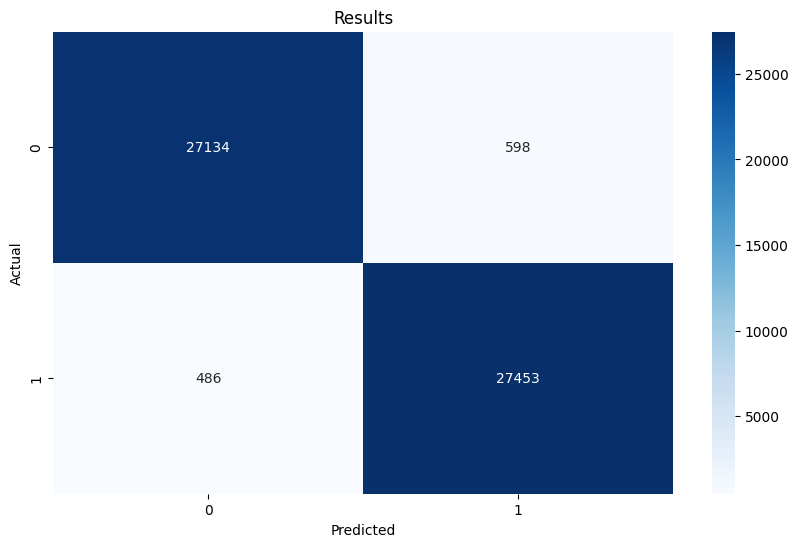

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Results")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

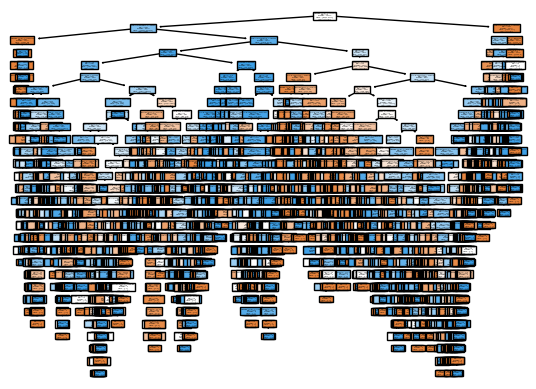

In [16]:
plt.title("Decision Tree for Credit Card Fraud Detection")
plot_tree(clf,filled=True,feature_names=X.columns,class_names=['Not Fraud','Fraud'])
plt.show()

### Saving model for the future use

In [17]:
joblib.dump(clf,'Credit Card Fraud Detection Model.pkl')

['Credit Card Fraud Detection Model.pkl']